In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

#### Gathering data

In [12]:
df_ab=pd.read_csv('Desktop\data.csv')


#### Assessing data

In [13]:
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
df_ab.info()
#Data Description
print('Number of null values in each column')
df_ab.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
Number of null values in each column


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [18]:
# What all user ids have duplicates?
print('Number of users :' + str(df_ab['user_id'].nunique()))

Number of users290584


In [22]:
print('Following user ids have duplicates')
df_dup=df_ab[df_ab.duplicated(['user_id'])]['user_id'].unique()
print(df_dup)

Following user ids have duplicates
[698120 773192 899953 ... 641570 689637 744456]


In [23]:
# New page is the treatment group whereas old page is the control group
df_nmatch = df_ab.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')") 
df_nmatch.shape[0]

3893

#### Cleaning data

In [24]:
df_cleaned = df_ab.drop_duplicates(['user_id'], keep='first')
df_cleaned = df_cleaned.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288540 entries, 0 to 294477
Data columns (total 5 columns):
user_id         288540 non-null int64
timestamp       288540 non-null object
group           288540 non-null object
landing_page    288540 non-null object
converted       288540 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.2+ MB


# EXPLORATORY DATA ANALYSIS

In [26]:
print('Probability that an individual receives the new page: '+ str(df_cleaned[df_cleaned['group']=='treatment'].shape[0]/df_cleaned.shape[0]))

Probability that an individual receives the new page: 0.5001524918555487


In [27]:
print('User conversion ratio irrespective of which page they open: '+ str(df_cleaned['converted'].mean()))

User conversion ratio irrespective of which page they open: 0.11950856033825466


In [29]:
print('Given that an individual is in the old page, what is his/her possiblity of conversion? ' + str(df_cleaned[df_cleaned['group'] == 'control']['converted'].mean()))
print('\nGiven that an individual is in the new page, what is his/her possiblity of conversion? ' + str(df_cleaned[df_cleaned['group'] == 'treatment']['converted'].mean()))

Given that an individual is in the old page, what is his/her possiblity of conversion? 0.12029037760181936

Given that an individual is in the new page, what is his/her possiblity of conversion? 0.11872721981235362


# A/B Testing

In [31]:
old_df=df_cleaned.query("group == 'control'")
new_df=df_cleaned.query("group == 'treatment'")

In [32]:
p_old=old_df['converted'].mean()
p_new=new_df['converted'].mean()
r_old=old_df.shape[0]
r_new=new_df.shape[0]

In [34]:
#Simulating r_new transactions with the convert rate p_new
new_page_converted = np.random.binomial(r_new,p_new)
#Simulating r_old transactions with the convert rate p_old
old_page_converted = np.random.binomial(r_old,p_old)
diff=new_page_converted/r_new - old_page_converted/r_old
print(diff)

-0.0007731925001137341


#### Null Hypothesis: p_new=p_old
#### Alternative hypothesis: p_new>p_old
#### error rate= 0.05


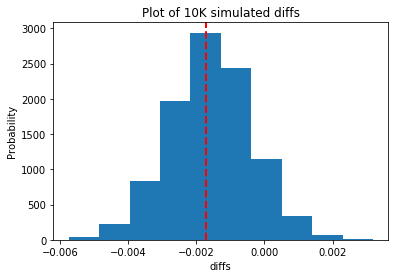

In [36]:
diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(r_new,p_new)
    old_page_converted = np.random.binomial(r_old, p_old)
    diff = new_page_converted/r_new - old_page_converted/r_old
    diffs.append(diff)
    
plt.hist(diffs)
plt.xlabel('diffs')
plt.ylabel('Probability')
plt.axvline(x=diff, color='r', linestyle='dashed', linewidth=2)
plt.title('Plot of 10K simulated diffs');

In [38]:
diffs = np.array(diffs)
p=(diff < diffs).mean()
print(p)

0.5508


## Inference
### We cannot reject the null hypothesis as p value is much greater than 0.05 which means the company should not go for the changes it has proposed in the webpage.